<a href="https://colab.research.google.com/github/Madihajavaid12345/Pakistan-tower-dataset/blob/main/pakistan_cell_tower_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 📊 Pakistan Cell Tower Dataset – Exploratory Data Analysis (EDA) Report

##  Project Overview
This project performs a deep Exploratory Data Analysis (EDA) of a dataset containing information about **cell towers in Pakistan**. The aim is to extract **useful insights** related to:

- Types of cellular technologies used (LTE, UMTS, GSM)
- Tower distribution across Pakistan
- Signal strength and coverage areas
- Density of towers in various regions

---

##  Dataset Description

The dataset contains **1818 rows and 14 columns**, with the following key fields:

| Column | Description |
|--------|-------------|
| `radio` | Technology type (GSM, UMTS, LTE) |
| `lat`, `lon` | Tower location (latitude and longitude) |
| `range` | Estimated coverage range |
| `samples` | Number of signal samples collected |
| `averageSignal` | Average signal strength |
| `created`, `updated` | Timestamps for tower data entry |

---

##  Goals of EDA

- Understand the structure and content of the dataset
- Clean and prepare the data (check for missing values, data types)
- Visualize tower distribution by technology type
- Plot tower density using heatmaps
- Display interactive maps using Folium
- Identify regions with strong or weak signal coverage

---

##  Tools Used

- `pandas` – data loading and processing  
- `matplotlib` and `seaborn` – charts and static heatmaps  
- `folium` – interactive maps and live heatmaps  
- `Google Colab` – interactive cloud-based Python notebook

---

## Visualizations Included
-Bar chart of tower count by technology (LTE, UMTS, GSM)
-Bar chart of average signal strength by technology
-Heatmap showing tower density (static)
-Live interactive map with tower markers
-Live heatmap on map (Folium)

---

## Prepared by

**Madiha Javaid**  


---

> Let’s dive into the code and start extracting insights!


In [ ]:
# STEP 1: IMPORT LIBRARIES
import pandas as pd
import folium
import seaborn as sns
import matplotlib.pyplot as plt
from folium.plugins import HeatMap
from IPython.display import HTML

# Load the dataset
df = pd.read_csv('pakistan_cell_towers.csv')

# Show basic info
print(df.shape)  # Rows and columns
print(df.columns)  # List of column names
print(df.dtypes)  # Data types
print("\nMissing Values:\n", df.isnull().sum())
# View first 5 rows
df.head()


(1818, 14)
Index(['radio', 'mcc', 'net', 'area', 'cell', 'unit', 'lon', 'lat', 'range',
       'samples', 'changeable', 'created', 'updated', 'averageSignal'],
      dtype='object')
radio             object
mcc                int64
net                int64
area               int64
cell               int64
unit               int64
lon              float64
lat              float64
range              int64
samples            int64
changeable         int64
created            int64
updated            int64
averageSignal      int64
dtype: object

Missing Values:
 radio            0
mcc              0
net              0
area             0
cell             0
unit             0
lon              0
lat              0
range            0
samples          0
changeable       0
created          0
updated          0
averageSignal    0
dtype: int64


,radio,mcc,net,area,cell,unit,lon,lat,range,samples,changeable,created,updated,averageSignal
0,LTE,410,4,33,562691,0,67.1477,24.9556,1946,9,1,1450002352,1747979642,0
1,UMTS,410,3,31008,940491,57,68.3533,25.3786,1000,3,1,1458655423,1744823222,0
2,UMTS,410,6,2001,8467427,287,67.1290,24.9325,1000,2,1,1457144874,1747987685,0
3,UMTS,410,6,2030,8467427,287,67.1267,24.9361,1000,2,1,1452784677,1747979642,0
4,GSM,410,6,230,13891,0,67.1347,24.9700,1000,2,1,1442902812,1745061004,0


In [ ]:
df['created_date'] = pd.to_datetime(df['created'], unit='s')
df['updated_date'] = pd.to_datetime(df['updated'], unit='s')
df['year_created'] = df['created_date'].dt.year
df['year_updated'] = df['updated_date'].dt.year


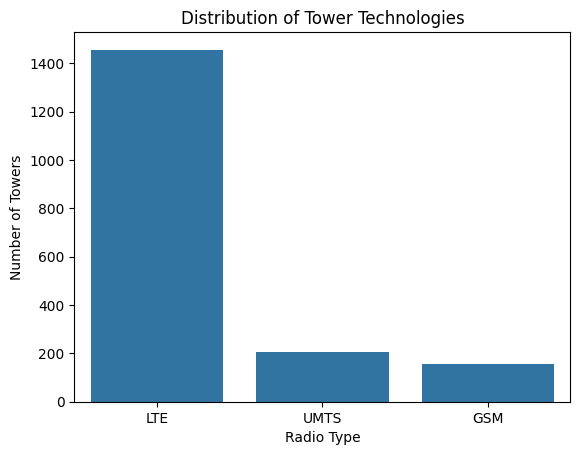

In [ ]:

sns.countplot(data=df, x='radio')
plt.title('Distribution of Tower Technologies')
plt.xlabel('Radio Type')
plt.ylabel('Number of Towers')
plt.show()


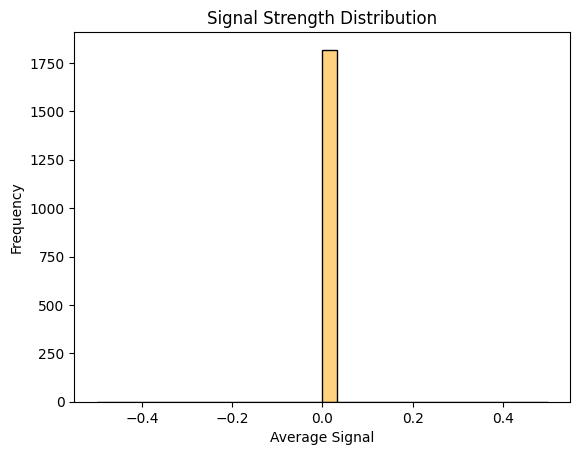

In [ ]:
sns.histplot(df['averageSignal'], kde=True, bins=30, color='orange')
plt.title('Signal Strength Distribution')
plt.xlabel('Average Signal')
plt.ylabel('Frequency')
plt.show()


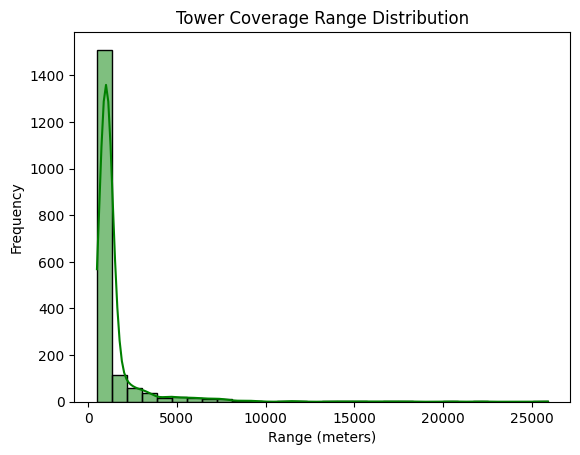

In [ ]:
sns.histplot(df['range'], kde=True, bins=30, color='green')
plt.title('Tower Coverage Range Distribution')
plt.xlabel('Range (meters)')
plt.ylabel('Frequency')
plt.show()


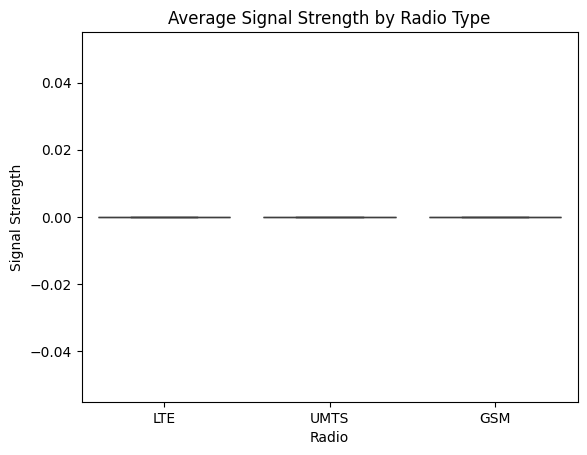

In [ ]:
sns.boxplot(data=df, x='radio', y='averageSignal')
plt.title('Average Signal Strength by Radio Type')
plt.xlabel('Radio')
plt.ylabel('Signal Strength')
plt.show()


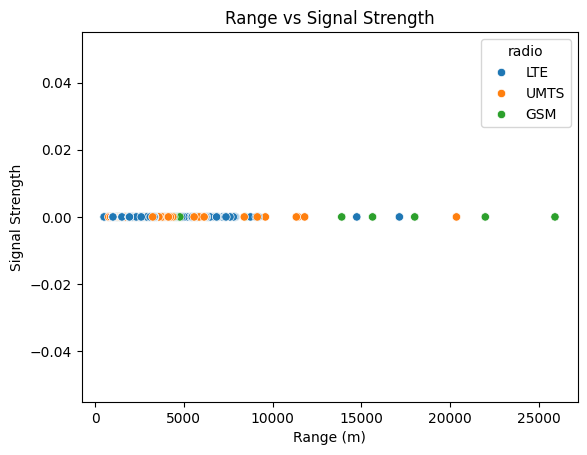

In [ ]:
sns.scatterplot(data=df, x='range', y='averageSignal', hue='radio')
plt.title('Range vs Signal Strength')
plt.xlabel('Range (m)')
plt.ylabel('Signal Strength')
plt.show()


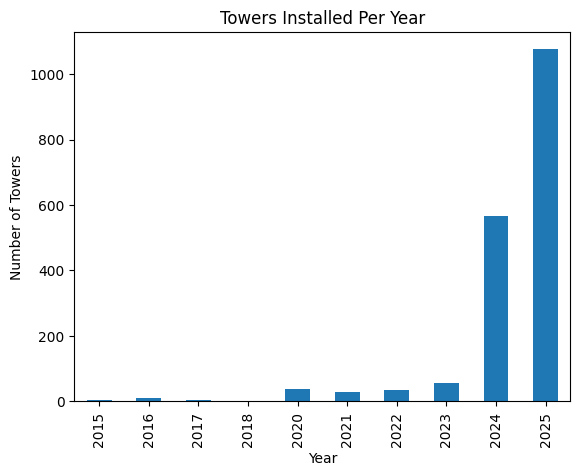

In [ ]:
df['year_created'].value_counts().sort_index().plot(kind='bar')
plt.title('Towers Installed Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Towers')
plt.show()


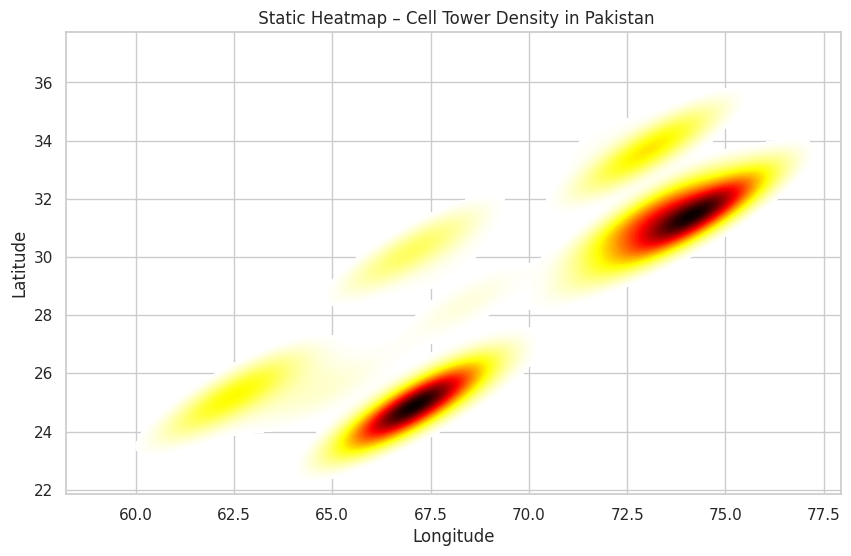

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Create 2D density heatmap
plt.figure(figsize=(10,6))

sns.kdeplot(
    x=df['lon'],  # Longitude
    y=df['lat'],  # Latitude
    cmap='hot_r',  # Color style (hot red)
    fill=True,     # Fill inside contours
    thresh=0.05,   # Threshold to ignore very low density
    levels=100     # Detail level
)

plt.title(" Static Heatmap – Cell Tower Density in Pakistan")
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.show()


In [ ]:
import folium
from IPython.display import HTML

# Create map
pakistan_map = folium.Map(location=[30.3753, 69.3451], zoom_start=5)

# Add markers from your DataFrame
for index, row in df.iterrows():
    folium.CircleMarker(
        location=[row['lat'], row['lon']],
        radius=3,
        popup=f"{row['radio']} | Signal: {row['averageSignal']}",
        color='red' if row['radio'] == 'LTE' else 'blue' if row['radio'] == 'UMTS' else 'green',
        fill=True,
        fill_opacity=0.6
    ).add_to(pakistan_map)

# Save map to file
pakistan_map.save("pakistan_tower_map.html")

#  Open and show HTML content directly
with open("pakistan_tower_map.html", "r") as f:
    html_data = f.read()

HTML(html_data)

